In [1]:
# brute force calculation of the special functions that are defined by terms
# k^n/(n!sqrt(n))
# k^n/(n!n))
# k^n/(n!sqrt(n)^3)

In [2]:
import Pkg; Pkg.add("SpecialFunctions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [3]:
kk = range(BigFloat(0),stop=BigFloat(300),length=1000)

1000-element LinRange{BigFloat}:
 0.0,0.3003,0.600601,0.900901,1.2012,…,298.799,299.099,299.399,299.7,300.0

In [4]:
function onedimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/sqrt(BigFloat((i-1)*2+1))
    end
    return result
end

function onedreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/sqrt(BigFloat(2*i))
    end
    return result
end

onedreal (generic function with 1 method)

In [5]:
function twodimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/BigFloat((i-1)*2+1)
    end
    return result
end

function twodreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/BigFloat(2*i)
    end
    return result
end

twodreal (generic function with 1 method)

In [6]:
function threedimag(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^(i+1)*BigFloat(k)^((i-1)*2+1)/factorial(big((i-1)*2+1))/sqrt(BigFloat((i-1)*2+1))^3
    end
    return result
end

function threedreal(k,terms)
    result = BigFloat(0)
    for i in 1:terms
        result = result + (-1)^i*BigFloat(k)^(i*2)/factorial(big(2*i))/sqrt(BigFloat(2*i))^3
    end
    return result
end

threedreal (generic function with 1 method)

In [13]:
setprecision(BigFloat,1024)
onedrealk = onedreal.(kk,500)
onedimagk = onedimag.(kk,500)
twodrealk = twodreal.(kk,500)
twodimagk = twodimag.(kk,500)
threedrealk = threedreal.(kk,500)
threedimagk = threedimag.(kk,500)


1000-element Array{BigFloat,1}:
 0.0                                                                                                                                                                                                                                                                                                                     
 0.2994334895564127083476346782810058930774903262672958402052520446988421796297786336580972260790984542560461732443211708417355505276362073139944295855047159103918405495584845696432888989847531892132452826952580467079252020463791410346109495029240501485705454846016972258553605225211378955153099239876986863924683
 0.5937095196942078309681389408856910932223741244541570734293373447844583111242577329753640780805822575610954893932127166031268831126223668882286237338518944664890451672668271121534882471603389140328681096560316114514720617409954729412220209702038682191463218522729720214846986758735428597577972037938099672868418
 0.87788513845595563194386

In [14]:
onedrealkf = convert(Array{Float64}, onedrealk)
onedimagkf = convert(Array{Float64}, onedimagk)
twodrealkf = convert(Array{Float64}, twodrealk)
twodimagkf = convert(Array{Float64}, twodimagk)
threedrealkf = convert(Array{Float64}, threedrealk)
threedimagkf = convert(Array{Float64}, threedimagk)
kf = convert(Array{Float64}, kk)

1000-element Array{Float64,1}:
   0.0               
   0.3003003003003003
   0.6006006006006006
   0.9009009009009009
   1.2012012012012012
   1.5015015015015014
   1.8018018018018018
   2.1021021021021022
   2.4024024024024024
   2.7027027027027026
   3.003003003003003 
   3.3033033033033035
   3.6036036036036037
   ⋮                 
 296.6966966966967   
 296.996996996997    
 297.2972972972973   
 297.5975975975976   
 297.8978978978979   
 298.1981981981982   
 298.4984984984985   
 298.79879879879877  
 299.0990990990991   
 299.3993993993994   
 299.6996996996997   
 300.0               

In [9]:
print(onedrealkf)

UndefVarError: UndefVarError: onedrealkf not defined

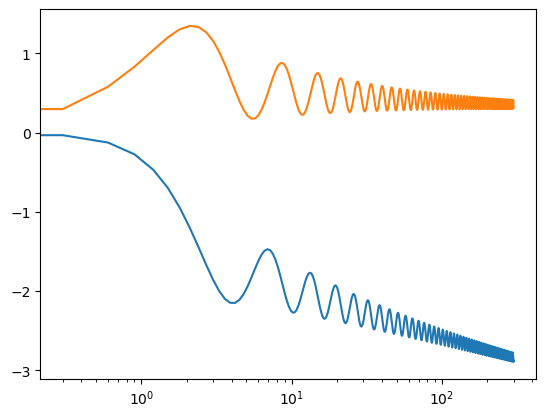

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1480102d0>

In [22]:
using PyPlot
semilogx(kf,onedrealkf)
semilogx(kf,onedimagkf)

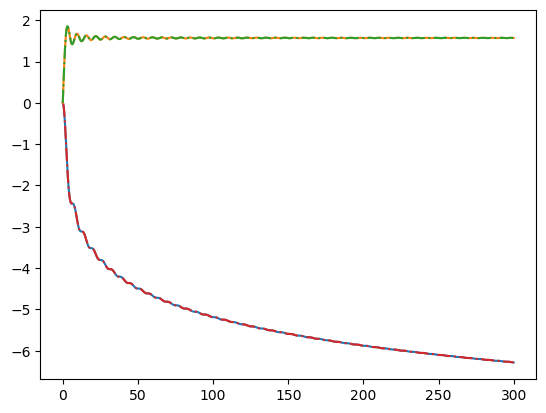

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147a36ad0>

In [19]:
using SpecialFunctions
plot(kf,twodrealkf)
plot(kf,twodimagkf)
plot(kf,sinint.(kf),"-.")
plot(kf,cosint.(kf)-log.(kf).-Base.MathConstants.eulergamma,"-.")

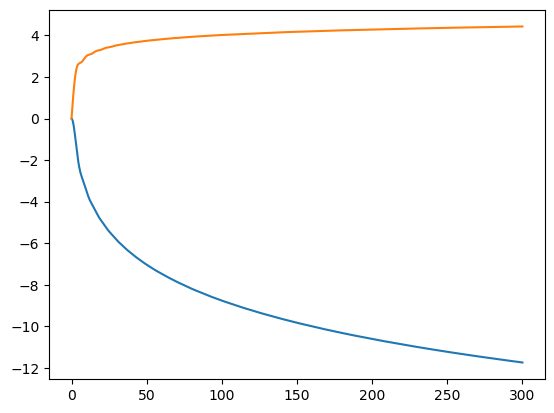

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x147c80110>

In [20]:
plot(kf,threedrealkf)
plot(kf,threedimagkf)